### Task 2.4: Fundamentals of Visualization Libraries Part 2

In [1]:
# Importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
path ='/Users/vickyczada/Library/CloudStorage/OneDrive-Personal/Documents/Career Foundry/Data Visualisation with Python/Achievement 2/New_York_Citi_Bikes_2022/NewYork_Bikes_data.csv'

In [3]:
# Obtaining citibikes dataset
df_merged = pd.read_csv(path, index_col = 0)

/var/folders/bm/wxz2f90s7x104nl7tfs2lwdw0000gn/T/ipykernel_59655/1475828544.py:2: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv(path, index_col = 0)


In [4]:
df_merged.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,2022-08-27,27.8,both
1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,casual,2022-08-20,27.9,both
2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,member,2022-08-31,25.6,both
3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.1,40.744219,-73.971212,40.764397,-73.973715,member,2022-08-02,26.4,both
4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,member,2022-08-25,28.1,both


In [5]:
df_merged.drop(columns = {'_merge'}, inplace = True)

In [6]:
df_merged.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [7]:
df_merged.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [8]:
# Setting the theme, style, and color palette
sns.set_theme(style = "dark", palette = "PuRd_r")

#### Bar chart of the top 20 starting stations frequencies

In [9]:
df_merged['value'] = 1
df_start_station_frequencies = df_merged.groupby('start_station_name')['value'].count().reset_index()

In [10]:
df_start_station_frequencies

,start_station_name,value
0,1 Ave & E 110 St,21526
1,1 Ave & E 16 St,67350
2,1 Ave & E 18 St,70854
3,1 Ave & E 30 St,45412
4,1 Ave & E 39 St,52373
...,...,...
1756,Wyckoff Ave & Gates Ave,16556
1757,Wyckoff St & 3 Ave,250
1758,Wyckoff St & Nevins St,11527
1759,Wythe Ave & Metropolitan Ave,66470


In [11]:
top20 = df_start_station_frequencies.nlargest(20, 'value')

In [12]:
top20

,start_station_name,value
1587,W 21 St & 6 Ave,129018
1718,West St & Chambers St,123291
495,Broadway & W 58 St,114293
286,6 Ave & W 33 St,106445
8,1 Ave & E 68 St,104856
461,Broadway & E 14 St,98866
485,Broadway & W 25 St,98425
1511,University Pl & E 14 St,97126
463,Broadway & E 21 St,95691
1603,W 31 St & 7 Ave,94208


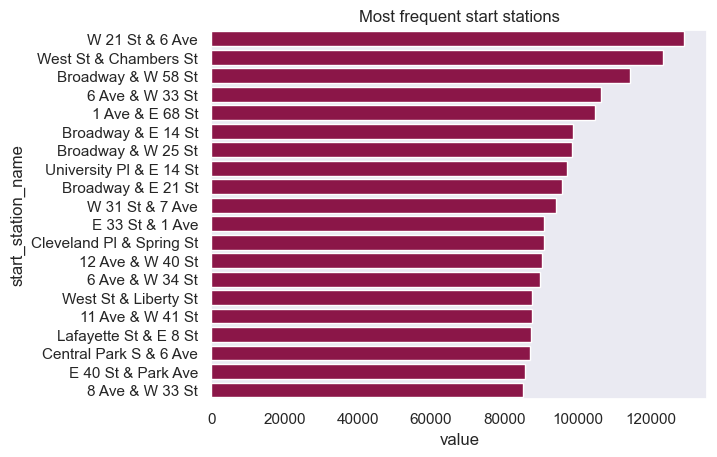

In [13]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

The palette selected for the theme did not effectively apply to the bar plot. This issue likely stems from the fact that the plot is categorical in nature, and the sequential color palette 'PuRd' is not suitable or does not display correctly for categorical data. To address this, I am temporarily overriding the palette specifically for this plot, selecting a different color palette better suited for categorical distinctions, ensuring that the visualization clearly differentiates each station and improves overall readability.

/var/folders/bm/wxz2f90s7x104nl7tfs2lwdw0000gn/T/ipykernel_59655/1245033963.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20, x = 'value', y = 'start_station_name',palette="PuRd_r")


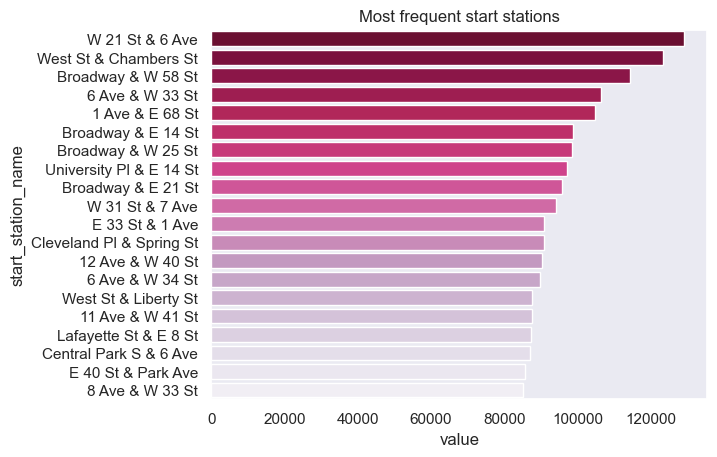

In [14]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name',palette="PuRd_r")
plt.title("Most frequent start stations")
plt.show()

#### Dual-axis line plot from the previous Exercise using seaborn

In [15]:
df_merged['date'] = pd.to_datetime(df_merged['date'])

In [16]:
# Groupby the count of the trips 
df_group = pd.DataFrame(df_merged.groupby(['date'])['ride_id'].count()).reset_index()

In [17]:
# Renaming the ride_id column as trip_count for clarity.
df_group.rename(columns = {'ride_id':'trip_count'}, inplace = True)
# Merging trip count data with weather data.
df_final = df_merged.merge(df_group, on='date', how='outer', indicator='merge_flag')
print(df_final['merge_flag'].value_counts(dropna = False))
print("Shape of January 1st is", df_final[df_final['date'] == '2022-01-01'].shape) # Check
print("Shape of January 2nd is", df_final[df_final['date'] == '2022-01-02'].shape) # Second check

merge_flag
both          29838806
left_only            0
right_only           0
Name: count, dtype: int64
Shape of January 1st is (20428, 18)
Shape of January 2nd is (43009, 18)


In [18]:
df_merged = df_final.set_index('date')
print(df_merged.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'value', 'trip_count', 'merge_flag'],
      dtype='object')


In [19]:
df_merged.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'value', 'trip_count', 'merge_flag'],
      dtype='object')

In [20]:
df_merged.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,value,trip_count,merge_flag
date,,,,,,,,,,,,,,,,,
2021-01-30,34BD74D84D320CF5,electric_bike,2021-01-30 17:30:45.544,2022-05-23 06:17:27.131,W 144 St & Adam Clayton Powell Blvd,7932.1,Frederick Douglass Blvd & W 112 St,7631.23,40.820877,-73.939249,40.801694,-73.957145,casual,NaN,1,1,both
2021-02-15,FA436228F4CD7647,classic_bike,2021-02-15 14:11:20.946,2022-08-10 15:01:30.839,Kent Ave & S 11 St,5062.01,Union Ave & Jackson St,5300.06,40.707645,-73.968415,40.716075,-73.952029,casual,NaN,1,1,both
2021-03-11,8FC77EAE2C0561E4,classic_bike,2021-03-11 22:08:54.461,2022-06-16 09:12:21.565,Union St & 4 Ave,4175.15,Flatbush Ave & Ocean Ave,3704.04,40.677274,-73.982820,40.663657,-73.963014,casual,NaN,1,1,both
2021-03-14,BF45D1E037463AA8,classic_bike,2021-03-14 18:17:59.923,2022-02-02 23:38:01.993,N 12 St & Bedford Ave,5450.04,S Portland Ave & Hanson Pl,4354.05,40.720798,-73.954847,40.685396,-73.974315,member,NaN,1,1,both
2021-03-31,763D82F8CFA1D9D1,classic_bike,2021-03-31 15:35:20.070,2022-09-25 14:33:21.607,Willoughby St & Fleet St,4628.05,DeKalb Ave & Franklin Ave,4528.01,40.691966,-73.981302,40.690648,-73.957462,casual,NaN,1,1,both


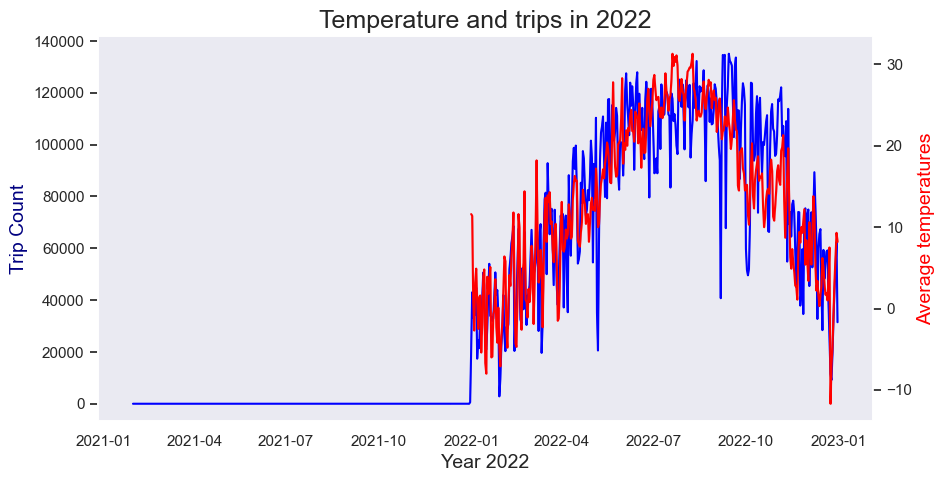

In [21]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_merged['trip_count'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Trip Count", color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_merged['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

In [22]:
df_merged.dtypes

ride_id                 object
rideable_type           object
started_at              object
ended_at                object
start_station_name      object
start_station_id        object
end_station_name        object
end_station_id          object
start_lat              float64
start_lng              float64
end_lat                float64
end_lng                float64
member_casual           object
avgTemp                float64
value                    int64
trip_count               int64
merge_flag            category
dtype: object

#### Box Plot of a categorical variable from the dataset

I am selecting 'rideable_bike' as the categorical variable to generate a box plot, as it provides a clear comparison of the different types of bikes used. To create this box plot, a corresponding numerical variable is required to represent the trip duration. This can be derived from the 'started_at' and 'ended_at' columns by calculating the time difference between these timestamps, which produces the duration of each trip in a suitable unit. Using this trip duration as the numerical variable allows for an effective visualization of the distribution and variability of trip lengths across different bike types.

In [23]:
# Convert 'started_at' and 'ended_at' to datetime
df_merged['started_at'] = pd.to_datetime(df_merged['started_at'])
df_merged['ended_at'] = pd.to_datetime(df_merged['ended_at'])

In [24]:
# Calculate the ride duration in minutes
df_merged['tripduration'] = (df_merged['ended_at'] - df_merged['started_at']).dt.total_seconds() / 60

In [25]:
df_merged

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,value,trip_count,merge_flag,tripduration
date,,,,,,,,,,,,,,,,,,
2021-01-30,34BD74D84D320CF5,electric_bike,2021-01-30 17:30:45.544,2022-05-23 06:17:27.131,W 144 St & Adam Clayton Powell Blvd,7932.1,Frederick Douglass Blvd & W 112 St,7631.23,40.820877,-73.939249,40.801694,-73.957145,casual,NaN,1,1,both,687646.693117
2021-02-15,FA436228F4CD7647,classic_bike,2021-02-15 14:11:20.946,2022-08-10 15:01:30.839,Kent Ave & S 11 St,5062.01,Union Ave & Jackson St,5300.06,40.707645,-73.968415,40.716075,-73.952029,casual,NaN,1,1,both,779090.164883
2021-03-11,8FC77EAE2C0561E4,classic_bike,2021-03-11 22:08:54.461,2022-06-16 09:12:21.565,Union St & 4 Ave,4175.15,Flatbush Ave & Ocean Ave,3704.04,40.677274,-73.982820,40.663657,-73.963014,casual,NaN,1,1,both,664503.451733
2021-03-14,BF45D1E037463AA8,classic_bike,2021-03-14 18:17:59.923,2022-02-02 23:38:01.993,N 12 St & Bedford Ave,5450.04,S Portland Ave & Hanson Pl,4354.05,40.720798,-73.954847,40.685396,-73.974315,member,NaN,1,1,both,468320.034500
2021-03-31,763D82F8CFA1D9D1,classic_bike,2021-03-31 15:35:20.070,2022-09-25 14:33:21.607,Willoughby St & Fleet St,4628.05,DeKalb Ave & Franklin Ave,4528.01,40.691966,-73.981302,40.690648,-73.957462,casual,NaN,1,1,both,781858.025617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,F2C4F070A50F9F3B,classic_bike,2022-12-31 13:09:50.131,2022-12-31 13:35:28.984,White St & Moore St,4987.06,Bleecker St & Crosby St,5679.08,40.704508,-73.935100,40.726156,-73.995102,member,8.2,1,31466,both,25.647550
2022-12-31,79F3ED73A2BF585C,classic_bike,2022-12-31 17:33:04.512,2022-12-31 17:37:56.886,Division St & Bowery,5270.08,Centre St & Chambers St,5207.01,40.714193,-73.996732,40.712733,-74.004607,member,8.2,1,31466,both,4.872900
2022-12-31,DDED85920D307CE1,classic_bike,2022-12-31 09:14:53.652,2022-12-31 09:21:11.859,W 30 St & 10 Ave,6459.07,W 20 St & 8 Ave,6224.05,40.752694,-74.002353,40.743453,-74.000040,member,8.2,1,31466,both,6.303450


In [26]:
df_merged.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
avgTemp                      float64
value                          int64
trip_count                     int64
merge_flag                  category
tripduration                 float64
dtype: object

In [27]:
df_merged['tripduration'].describe()

count    2.983881e+07
mean     1.861566e+01
std      5.102286e+02
min     -5.728892e+01
25%      5.796817e+00
50%      1.016220e+01
75%      1.799967e+01
max      7.818580e+05
Name: tripduration, dtype: float64

In [28]:
df_merged['tripduration'].describe().apply(lambda x: format(x, 'f'))

count    29838806.000000
mean           18.615656
std           510.228557
min           -57.288917
25%             5.796817
50%            10.162200
75%            17.999667
max        781858.025617
Name: tripduration, dtype: object

The 'tripduration' statistics show high variability with over 29.8 million trips. The average trip lasts about 18.6 units, but the large standard deviation of 510 indicates wide spread. Negative minimum values (-57.3) suggest data errors, while the maximum exceeds 781,858 units, indicating outliers. Most trips fall within the interquartile range of 5.8 to 18.0 units. To focus on typical trips and reduce noise from extreme outliers, setting a limit between 80 and 100 units is reasonable. This filtering improves analysis accuracy by concentrating on the main data and typical trip durations.

In [29]:
df_merged_1 = df_merged[(df_merged['tripduration'] > 0) & (df_merged['tripduration'] < 80)]

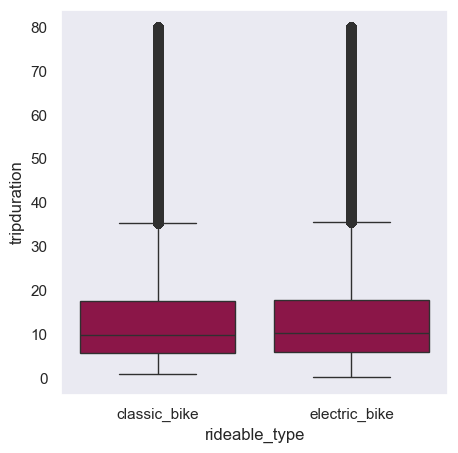

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'rideable_type', y = 'tripduration', data = df_merged_1)

plt.show()

The box plot shows the distribution of trip durations for classic and electric bikes. Both types have similar median trip durations and display a comparable presence of outliers, indicated by the long whiskers and numerous data points beyond them. This suggests that while typical trip durations are in a similar range for both bike types, there are instances of significantly longer trips. The boxes (interquartile range) are relatively compact, showing most trips are close to the median. Overall, both bike types show a consistent pattern in trip durations, indicating they are used similarly by riders.

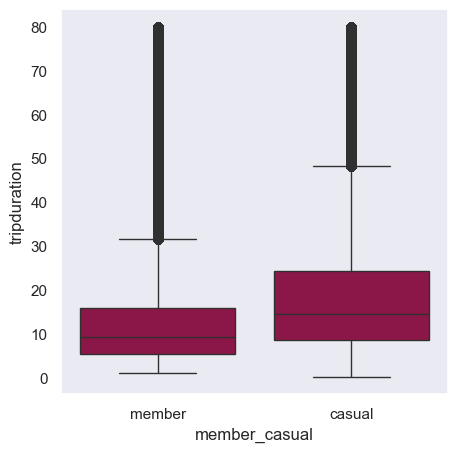

In [31]:
plt.figure(figsize=(5,5))
sns.boxplot(x = 'member_casual', y = 'tripduration', data = df_merged_1)

plt.show()

The box plot illustrates the distribution of trip durations for member and casual riders. The median trip duration for member riders is lower than for casual riders, indicating shorter typical trips among members. The interquartile range (IQR) for casual riders is wider, suggesting more varied trip durations compared to members. Additionally, members display more outliers, shown by the extended whiskers and numerous data points beyond them, indicating occasional longer trips. This pattern reveals that while casual riders opt for a broader range of trip durations, member trips tend to be shorter and more consistent.

In [32]:
df_merged.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,avgTemp,value,trip_count,tripduration
count,29838806,29838806,2.983881e+07,2.983881e+07,2.980141e+07,2.980141e+07,2.983817e+07,29838806.0,2.983881e+07,2.983881e+07
mean,2022-07-18 08:40:54.299819776,2022-07-18 08:59:31.239160064,4.074057e+01,-7.397525e+01,4.074035e+01,-7.397535e+01,1.712278e+01,1.0,9.518936e+04,1.861566e+01
min,2021-01-30 17:30:45.544000,2022-01-01 00:00:09.459000,4.062737e+01,-7.402802e+01,4.056000e+01,-7.428000e+01,-1.170000e+01,1.0,1.000000e+00,-5.728892e+01
25%,2022-05-14 18:36:59.667000064,2022-05-14 19:01:05.662749952,4.071605e+01,-7.399379e+01,4.071602e+01,-7.399380e+01,1.140000e+01,1.0,7.487300e+04,5.796817e+00
50%,2022-07-23 00:39:40.275000064,2022-07-23 01:03:29.442500096,4.073936e+01,-7.398166e+01,4.073932e+01,-7.398166e+01,1.790000e+01,1.0,1.036390e+05,1.016220e+01
75%,2022-09-26 13:22:41.772250112,2022-09-26 13:41:00.492999936,4.076319e+01,-7.395928e+01,4.076313e+01,-7.395943e+01,2.410000e+01,1.0,1.173210e+05,1.799967e+01
max,2022-12-31 23:58:19.206000,2022-12-31 23:59:55.708000,4.088398e+01,-7.387859e+01,4.106000e+01,-7.375000e+01,3.130000e+01,1.0,1.350720e+05,7.818580e+05
std,NaN,NaN,3.891787e-02,2.580543e-02,3.885558e-02,2.582301e-02,8.553446e+00,0.0,2.788531e+04,5.102286e+02


### FacetGrid plot

In [33]:
df_merged_1['tripduration'].describe().apply(lambda x: format(x, 'f'))

count    29520497.000000
mean           13.603854
std            11.526350
min             0.148833
25%             5.756450
50%            10.049433
75%            17.619767
max            79.999467
Name: tripduration, dtype: object

In [ ]:
# I have opted to provide palette choice temporarily for Facetgrid plot to differentiate the histogram obtained for the members and casual riders. 
grid = sns.FacetGrid(df_merged_1, col="member_casual",hue="member_casual",palette="Blues_r")

grid.map(sns.histplot, "tripduration", bins = 15)
plt.show()